Week-2/day-1/assignment-1:-
Problem statement :-
Dataset:- Marketing campaign dataset(customer spend, engagement, clicks)

1.   Calculate average spending per customer
2.   Identify top 10% of spenders
3.   Detect skewness in cusotmer engagement metrics



In [ ]:
# import all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
dataset = pd.read_csv('/content/marketing_campaign_dataset_500_rows.csv')
dataset.head()

,customer_id,spend,clicks,engagement_score
0,1,85.37,22,21.85
1,2,48.21,21,17.21
2,3,97.80,13,26.75
3,4,215.02,16,65.92
4,5,44.22,15,13.53


Calculate average spending per customer

In [ ]:
calculate_spend_count = dataset.groupby('customer_id')['spend'].sum()
calculate_spend_count

,spend
customer_id,
1,85.37
2,48.21
3,97.80
4,215.02
5,44.22
...,...
496,88.68
497,21.47
498,46.00


In [ ]:
average_spending_per_customer = calculate_spend_count.mean()
print(f"Average spending per customer: {average_spending_per_customer:.2f}")

Average spending per customer: 83.52


# Identify top 10% of spenders

# Task
Sort the calculated spend per customer, determine the 90th percentile spending threshold, identify customers exceeding this threshold, and visualize their spending with a bar plot, then summarize the findings about the top 10% of spenders.

In [ ]:
sorted_spend_per_customer = calculate_spend_count.sort_values(ascending=False)
print("Sorted customer spending:")
print(sorted_spend_per_customer.head())

Sorted customer spending:
customer_id
210    1750.15
479     872.18
180     631.53
114     501.16
221     438.43
Name: spend, dtype: float64


**Reasoning**:
Now that the total spend per customer is sorted, the next step is to calculate the 90th percentile spending threshold using the `quantile()` method on the `sorted_spend_per_customer` Series.



In [ ]:
spending_threshold_90th_percentile = sorted_spend_per_customer.quantile(0.90)
print(f"90th percentile spending threshold: {spending_threshold_90th_percentile:.2f}")

90th percentile spending threshold: 172.86


**Reasoning**:
With the 90th percentile spending threshold calculated, the next step is to identify all customers whose total spending exceeds this threshold to find the top 10% of spenders.



In [ ]:
top_10_percent_spenders = sorted_spend_per_customer[sorted_spend_per_customer >= spending_threshold_90th_percentile]
print("Top 10% of spenders (customer_id and their total spend):")
print(top_10_percent_spenders)

Top 10% of spenders (customer_id and their total spend):
customer_id
210    1750.15
479     872.18
180     631.53
114     501.16
221     438.43
126     392.06
379     391.83
375     379.12
235     375.99
285     372.31
253     368.68
324     358.94
421     348.86
461     319.98
168     301.00
107     298.14
388     295.47
157     292.71
32      289.18
394     283.81
249     267.44
422     265.02
489     249.24
475     239.96
267     237.26
437     236.45
283     227.56
7       226.17
74      223.22
417     220.53
136     220.29
72      217.94
362     216.91
495     215.04
4       215.02
435     211.06
492     206.84
83      206.46
352     205.99
21      204.20
178     201.98
373     201.55
271     199.77
123     192.97
426     187.12
474     186.83
66      185.05
398     184.65
142     177.05
315     176.78
Name: spend, dtype: float64


**Reasoning**:
To visualize the spending of the top 10% of spenders, a bar plot is an effective way to show each customer's total spend. This will allow for a clear comparison of spending amounts among the identified top spenders.



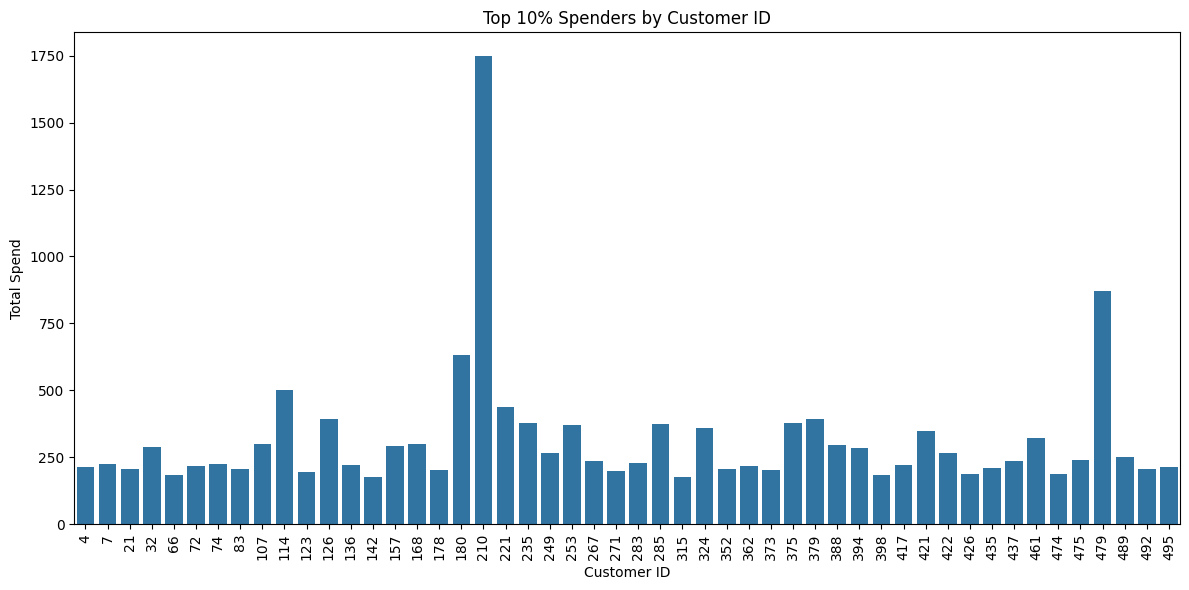

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_percent_spenders.index, y=top_10_percent_spenders.values)
plt.title('Top 10% Spenders by Customer ID')
plt.xlabel('Customer ID')
plt.ylabel('Total Spend')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# Detect skewness in customer engagement metrics

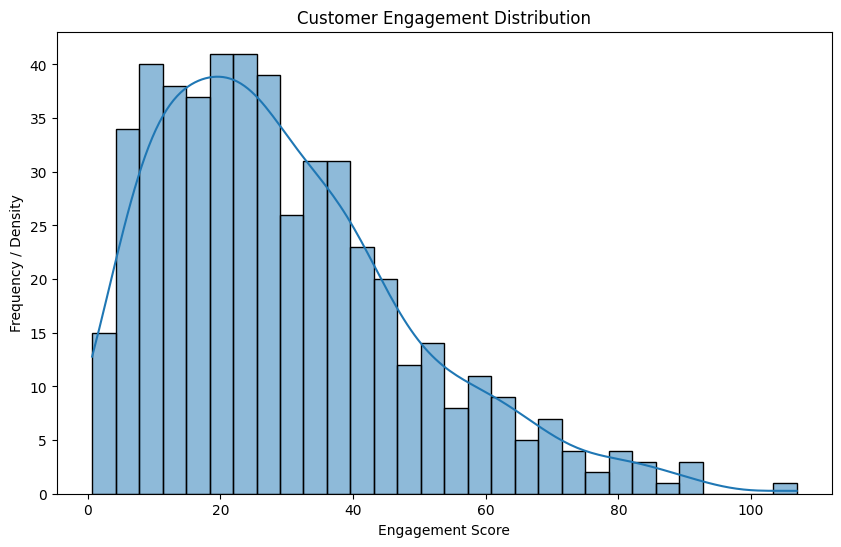

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

dataset = pd.read_csv('/content/marketing_campaign_dataset_500_rows.csv')

plt.figure(figsize=(10, 6))
sns.histplot(dataset['engagement_score'], bins=30, kde=True)
plt.title("Customer Engagement Distribution")
plt.xlabel("Engagement Score")
plt.ylabel("Frequency / Density")
plt.show()